# ASSIGNMENT 1
## Reading Data from CSV

In [5]:
data<-read.csv('HousePrices.csv', header = TRUE)

In [100]:
housing_price = data$Price

# Answer to Question 1)

In [14]:
mean(housing_price)

[1] 130427.3

In [15]:
median(housing_price)

[1] 125950

In [17]:
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

In [18]:
Mode(housing_price)

[1] 117800

In [11]:
price_per_sq_ft = data$SqFt

In [12]:
mean(price_per_sq_ft)

[1] 2000.938

In [19]:
median(price_per_sq_ft)

[1] 2000

In [20]:
Mode(price_per_sq_ft)

[1] 1920

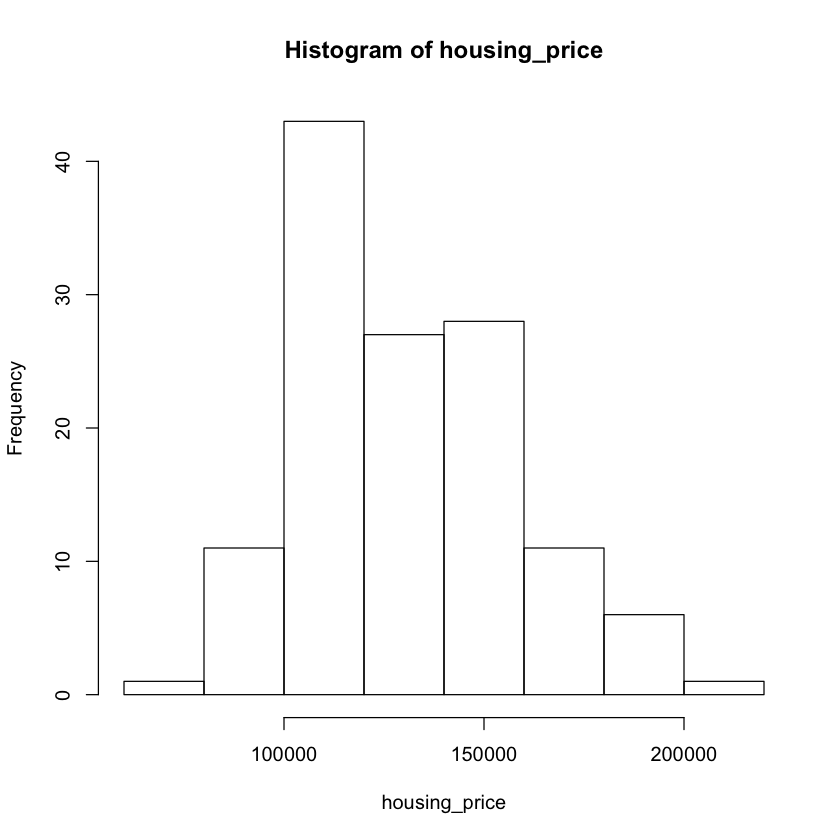

In [21]:
hist(housing_price)

## As it is right skewed, median will be much more appropriate to use for the central tendency.

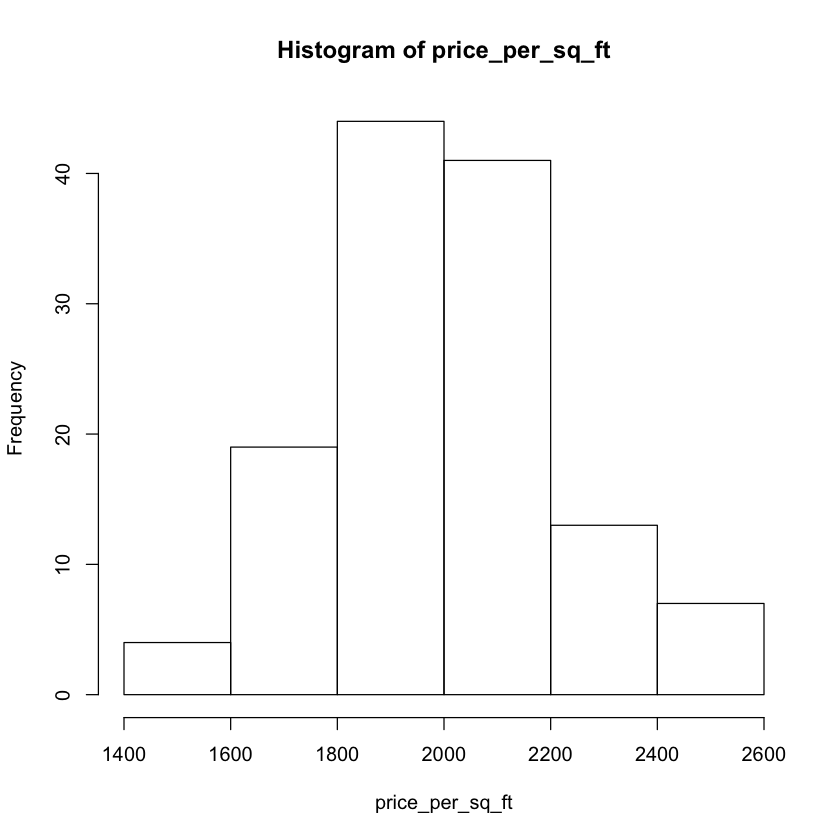

In [22]:
hist(price_per_sq_ft)

## In price per square feet, mean seems to be appropriate measure for the central tendency. Though it is not perfectly normally distributed, we can approximately consider mean to be the best measure for central tendency in this case.

In [162]:
east<-subset(data, Neighborhood=='East') 
north<-subset(data, Neighborhood=='North')
west<-subset(data, Neighborhood=='West')

In [165]:
cat('mean, median and standard deviation of east are: ',mean(east$Price), median(east$Price), sd(east$Price),'respectively, mean, median and standard deviation of west are: ', mean(west$Price), median(west$Price), sd(west$Price),
   'respectively, mean, median and standard deviation of north are: ', mean(north$Price), median(north$Price), sd(north$Price))

mean, median and standard deviation of east are:  125231.1 123100 17866.05 respectively, mean, median and standard deviation of west are:  159294.9 155400 19781.73 respectively, mean, median and standard deviation of north are:  110154.5 110750 15973.88

## mean, median and standard deviation of east are:  125231.1 123100 17866.05 respectively, mean, median and standard deviation of west are:  159294.9 155400 19781.73 respectively, mean, median and standard deviation of north are:  110154.5 110750 15973.88 respectively

In [167]:
cat(var(east$Price), var(west$Price), var(north$Price))

319195828 391316815 255164863

## ANSWER 2) variance of east side is greatest as we can see that it has mean value of approx 125k with sd of approx 17.8k dollars. Hence East region has the greatest variance.

## ANSWER 3) 
### Analysing the outliers in the dataset

In [27]:
range(housing_price)

[1]  69100 211200

In [28]:
boxplot.stats(housing_price
             )

$stats
[1]  69100 111250 125950 148600 199500

$n
[1] 128

$conf
[1] 120733.9 131166.1

$out
[1] 211200

## 1) Yes, there are outliers in the price dataset. Outlier = 211200

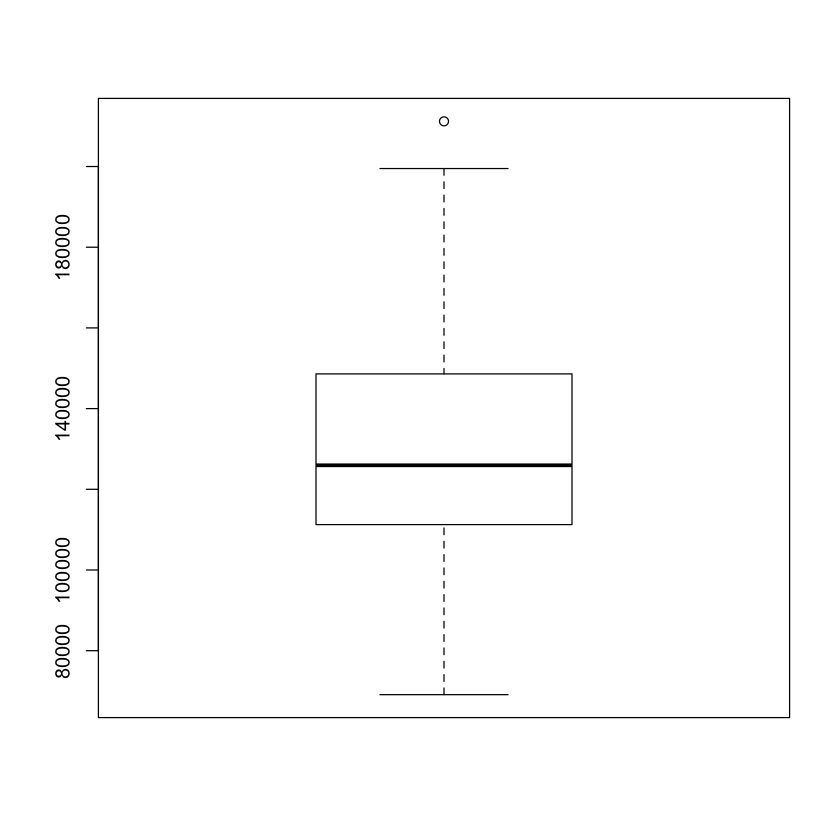

In [37]:
boxplot(housing_price)

In [38]:
boxplot.stats(price_per_sq_ft)

$stats
[1] 1520 1880 2000 2140 2530

$n
[1] 128

$conf
[1] 1963.69 2036.31

$out
[1] 2590 1450

## 2) Yes, there are outliers in the price dataset. 2 Outliers, 2590, 1450

In [39]:
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 1.5 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}


In [40]:
housing_price_without_outliers<-remove_outliers(housing_price)

In [41]:
price_per_sq_ft_without_outliers<-remove_outliers(price_per_sq_ft)

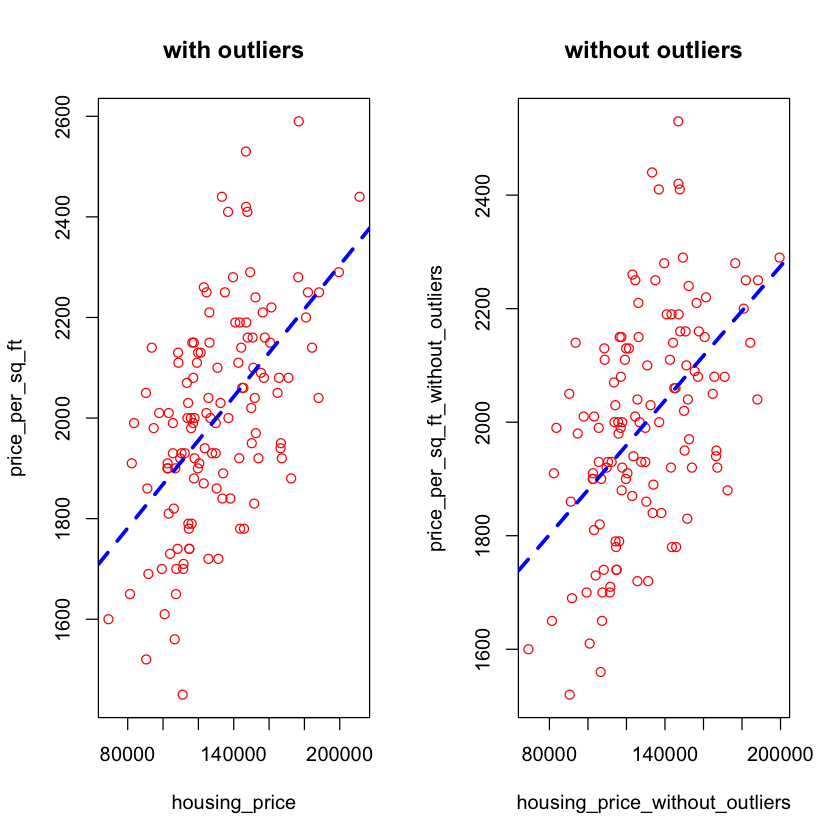

In [59]:

par(mfrow=c(1,2))
plot(housing_price, price_per_sq_ft, col = 'red', main = 'with outliers')
abline(lm(SqFt~Price, data = data),col = 'blue', lwd= 3, lty = 2)
plot(housing_price_without_outliers, price_per_sq_ft_without_outliers, col = 'red', main = 'without outliers')
abline(lm(price_per_sq_ft_without_outliers~housing_price_without_outliers),col = 'blue', lwd= 3, lty = 2)

In [63]:
cat('mean with outliers is equal to : ', mean(housing_price), ',mean wihout outliers is equal to : ', mean(housing_price_without_outliers, na.rm=TRUE))

mean with outliers is equal to :  130427.3 ,mean wihout outliers is equal to :  129791.3

In [64]:
cat('standard deviation with outliers is equal to : ', sd(housing_price), ',standard deviation wihout outliers is equal to : ', sd(housing_price_without_outliers, na.rm=TRUE))

standard deviation with outliers is equal to :  26868.77 ,standard deviation wihout outliers is equal to :  25989.87

## Answer 3) standard deviation and mean decreased after removing outliers for housing price.

In [68]:
cat('mean with outliers is equal to : ', mean(price_per_sq_ft), ',mean wihout outliers is equal to : ', mean(price_per_sq_ft_without_outliers, na.rm=TRUE))

mean with outliers is equal to :  2000.938 ,mean wihout outliers is equal to :  2000.635

In [69]:
cat('standard deviation with outliers is equal to : ', sd(price_per_sq_ft), ',standard deviation wihout outliers is equal to : ', sd(price_per_sq_ft_without_outliers, na.rm=TRUE))

standard deviation with outliers is equal to :  211.5724 ,standard deviation wihout outliers is equal to :  200.6858

## Not Much difference for the mean for price per square feet, standard deviation decreased by a margin of 11 dollars approximately.

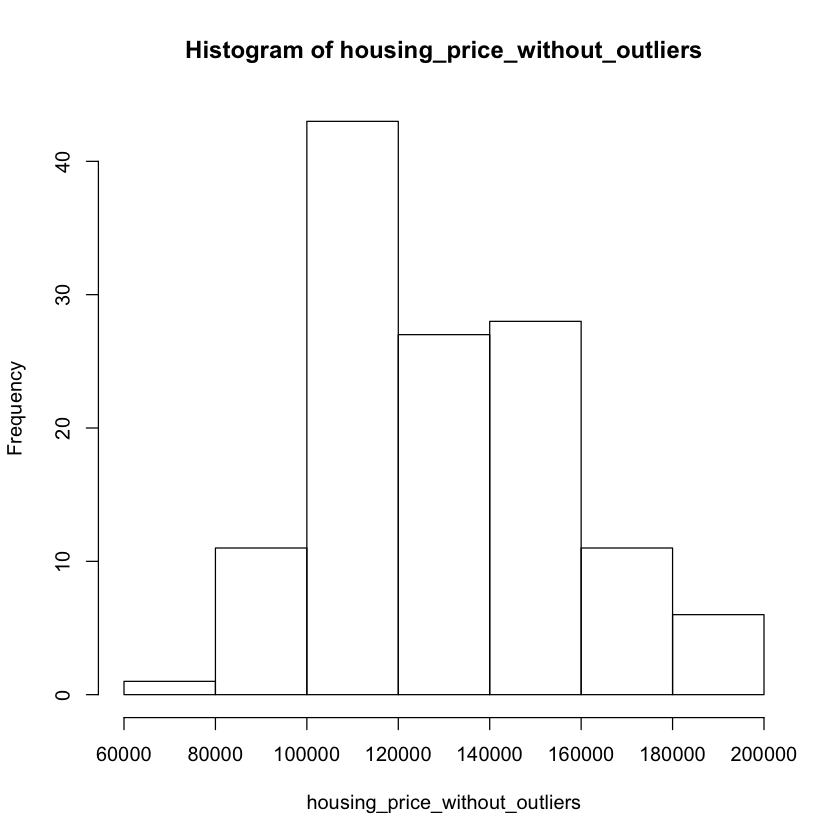

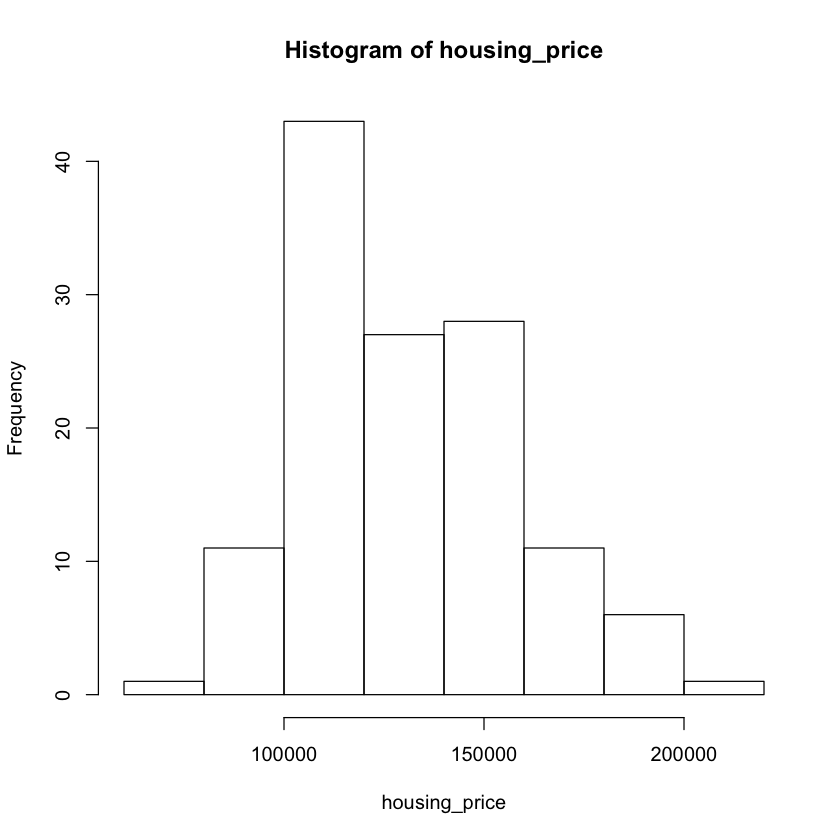

In [95]:
par(mfrow=c(1,1))
hist(housing_price_without_outliers)
hist(housing_price)

## Answer 4) 

In [92]:
offer<-data$Offers

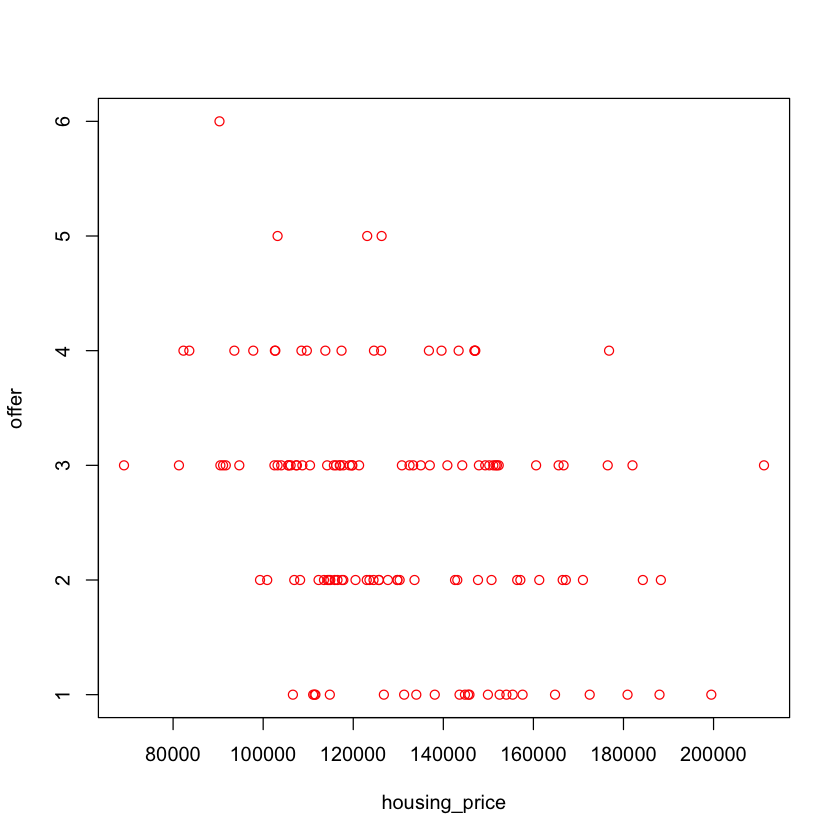

In [98]:
plot(housing_price,offer, col = 'red')
#lines(housing_price, offer, col = 'blue')

## PLOT INFERENCE: This plot basically tells us how many offers are there in a particular price range. The graph looks strange because majority of offers lie with the comparitively less expensive houses and very very few offers are there on the expensive ones.

In [168]:
cor(housing_price,offer)

[1] -0.3136359

## CORRELATION COEFFICIENT INFERENCE: The correlation coefficient of "-0.31" tells us that both, housing prices and offer are loosely and negatively correlated meaning there is no strong correlation between the two
